In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [14]:
X_train = np.loadtxt("C:/Users/Manis/Downloads/input.csv",delimiter=",")
Y_train = np.loadtxt("C:/Users/Manis/Downloads/labels.csv",delimiter=",")

In [26]:
X_test = np.loadtxt("C:/Users/Manis/Downloads/input_test.csv",delimiter=",")
Y_test = np.loadtxt("C:/Users/Manis/Downloads/labels_test.csv",delimiter=",")

In [27]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [28]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

In [29]:
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [30]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [31]:
X_train = X_train/255
X_test = X_test/255


[1.]


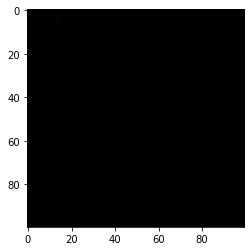

In [32]:
import random
index = random.randint(0,len(X_train))
print(Y_train[index])
plt.imshow(X_train[index,:])
plt.show()

In [33]:
# dog = 0
# cat = 1

In [34]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [35]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

In [36]:
history = model.fit(X_train,Y_train,epochs=5,batch_size=32)

Epoch 1/5
63/63 [==============================] - 14s 197ms/step - loss: 0.6934 - accuracy: 0.4990
Epoch 2/5
63/63 [==============================] - 12s 196ms/step - loss: 0.6932 - accuracy: 0.4865
Epoch 3/5
63/63 [==============================] - 13s 199ms/step - loss: 0.6933 - accuracy: 0.4970
Epoch 4/5
63/63 [==============================] - 12s 198ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
63/63 [==============================] - 12s 198ms/step - loss: 0.6932 - accuracy: 0.5000


In [37]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 56ms/step - loss: 0.7315 - accuracy: 0.5025


[0.7314796447753906, 0.5024999976158142]

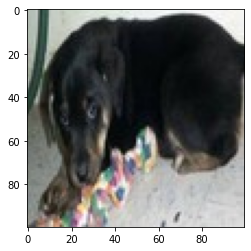

In [38]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

In [39]:
idx2

85

In [40]:
y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred

1/1 [==============================] - 0s 252ms/step


array([[0.42717135]], dtype=float32)

In [41]:
threshold = 0.5

In [42]:
if y_pred>threshold:
    pred = "Cat"
else:
    pred = "Dog"

In [43]:
print(f"This is a image of {pred}")

This is a image of Dog
